In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
churn_df=pd.read_csv("AIA_Churn_Modelling_Case_Study.csv")

In [4]:
dataset = churn_df

In [5]:
dataset =  dataset.drop(["Dependents","Partner","customerID","PaymentMethod"], axis=1)

In [6]:
dataset=pd.get_dummies(data=dataset, columns=['PhoneService',"MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","TotalCharges","TotalCharges","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","gender"])

In [7]:
dataset['Churn'] = churn_df['Churn'].replace({"Yes":1,"No":0})

In [8]:
X =  dataset.drop(['Churn'],axis=1)
y = dataset['Churn']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0) 
classifier.fit(X_train, y_train) 
predictions = classifier.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions )) 
print(accuracy_score(y_test, predictions ))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1041
           1       0.63      0.49      0.55       368

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

0.7913413768630234


<AxesSubplot:>

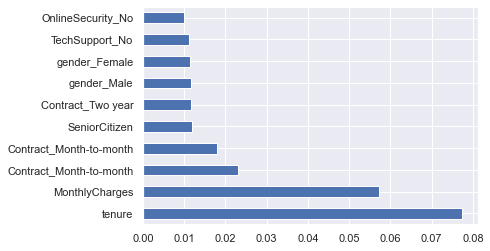

In [12]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

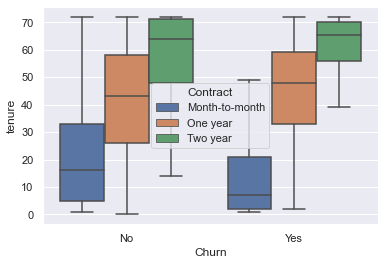

In [21]:
sns.boxplot(x='Churn',y='tenure',data=churn_df,hue="Contract",showfliers=False)

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 13128 entries, SeniorCitizen to gender_Male
dtypes: float64(1), int64(3), uint8(13124)
memory usage: 88.4 MB


In [23]:
dataset.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,gender_Female,gender_Male
0,0,1,29.85,0,1,0,0,1,0,1,...,1,0,0,1,0,0,0,1,1,0
1,0,34,56.95,0,0,1,1,0,0,1,...,1,0,0,0,1,0,1,0,0,1
2,0,2,53.85,1,0,1,1,0,0,1,...,1,0,0,1,0,0,0,1,0,1
3,0,45,42.30,0,1,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,1
4,0,2,70.70,1,0,1,1,0,0,0,...,1,0,0,1,0,0,0,1,1,0
